# **Yulu Case Study**

**Yulu**, India's pioneering micro-mobility service provider, has embarked on a mission to revolutionize daily commutes by offering unique,
sustainable transportation solutions. However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting company to delve into the factors influencing the demand for their shared electric cycles, specifically in the Indian market.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kruskal
from statsmodels.graphics.gofplots import qqplot


In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df1 = df.copy(deep = True)

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
cols = ['season','holiday','workingday','weather']

df[cols] = df[cols].astype('object')

In [ ]:
df['season'].unique()

array([1, 2, 3, 4], dtype=object)

In [ ]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=object)

In [ ]:
df['holiday'].unique()

array([0, 1], dtype=object)

In [ ]:
df['workingday'].unique()

array([0, 1], dtype=object)

In [ ]:
df['casual'].nunique()

309

In [ ]:
df['registered'].nunique()

731

In [ ]:
df['count'].nunique()

822

In [ ]:
df['datetime'].unique()
#= pd.to_datetime(df_yulu['datetime'])
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
# df['datetime'] = pd.to_datetime(df['datetime'])




In [ ]:
df.dtypes

,0
datetime,datetime64[ns]
season,object
holiday,object
workingday,object
weather,object
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
df.season.value_counts()



,count
season,
4,2734
2,2733
3,2733
1,2686


In [ ]:
df.weather.value_counts()


,count
weather,
1,7192
2,2834
3,859
4,1


In [ ]:
df.workingday.value_counts()


,count
workingday,
1,7412
0,3474


<Axes: xlabel='datetime'>

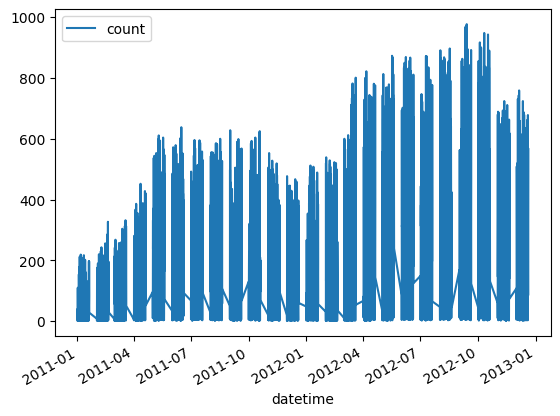

In [ ]:
df.plot.line(x='datetime',y='count')


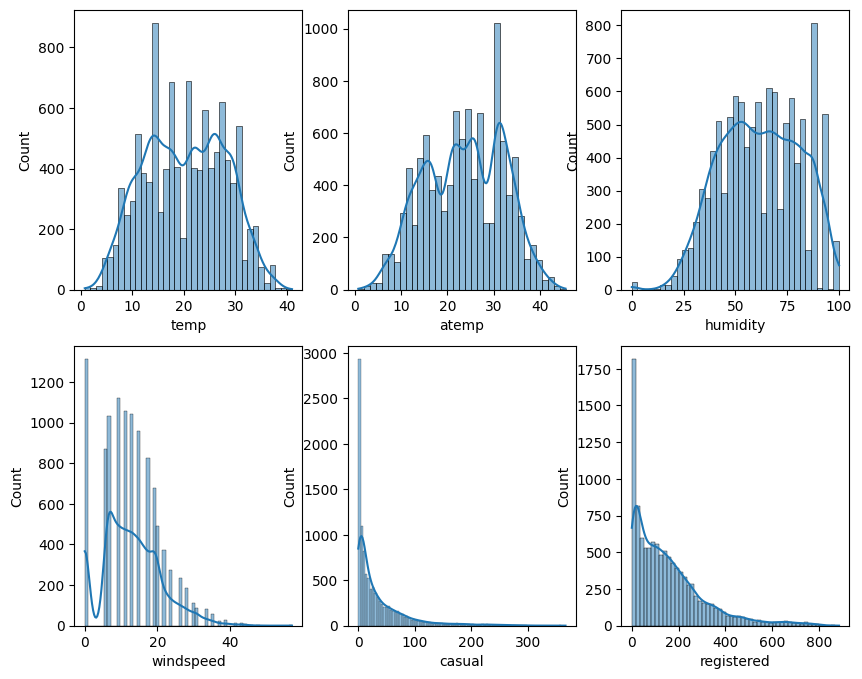

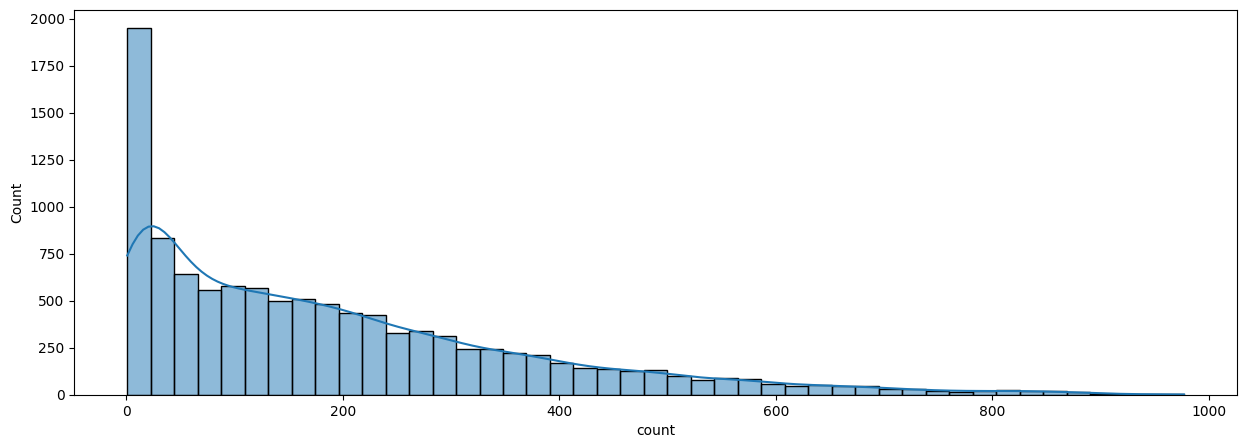

In [ ]:
columns_cat=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(10,8))

index=0
for row in range(2):
  for col in range(3):
    sns.histplot(df[columns_cat[index]],ax=axis[row,col],kde=True)
    index += 1
plt.show()

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(15,5))
sns.histplot(df[columns_cat[-1]], kde=True)
plt.show()


 Each histogram shows the distribution of values for the respective column, providing insights into the frequency of different ranges within the data.


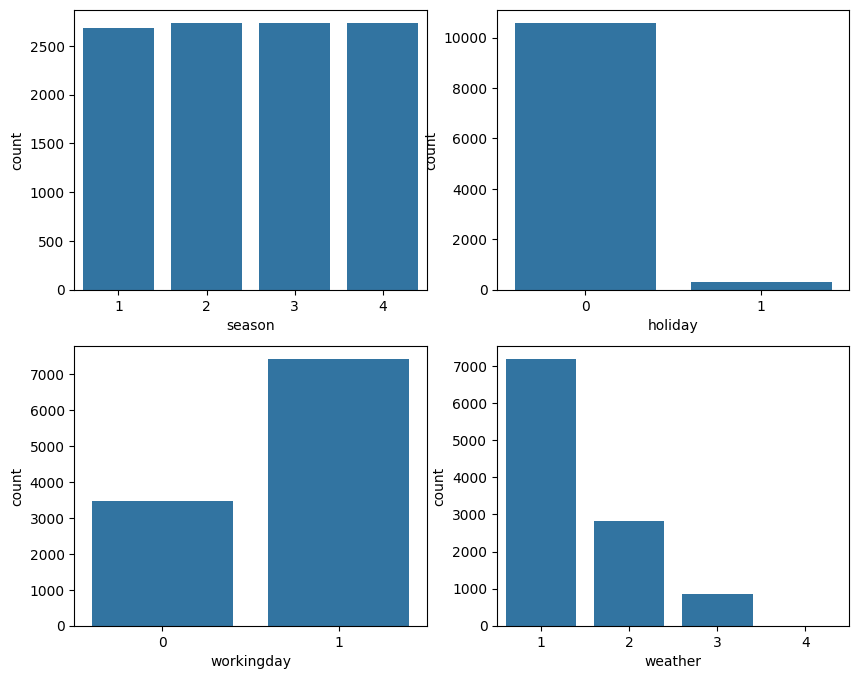

In [ ]:
cat=["season","holiday","workingday","weather"]
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(10,8))

index=0
for row in range(2):
  for col in range(2):
    sns.countplot(x=df[cat[index]],ax=axis[row,col])
    index +=1
plt.show()


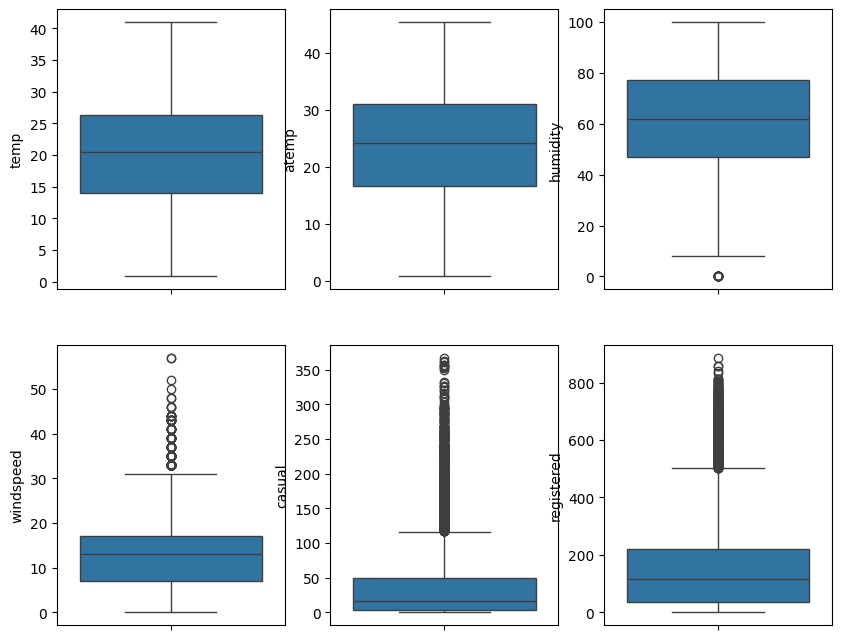

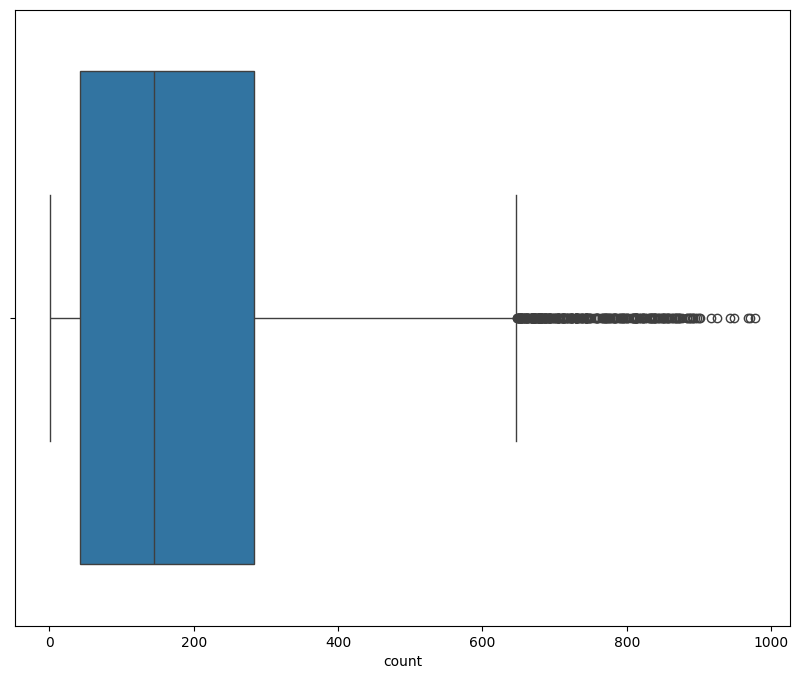

In [ ]:
columns_cat=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(10,8))

index=0
for row in range(2):
  for col in range(3):
    sns.boxplot(y=df[columns_cat[index]],ax=axis[row,col])
    index += 1
plt.show()

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(10,8))
sns.boxplot(x=df[columns_cat[-1]])
plt.show()

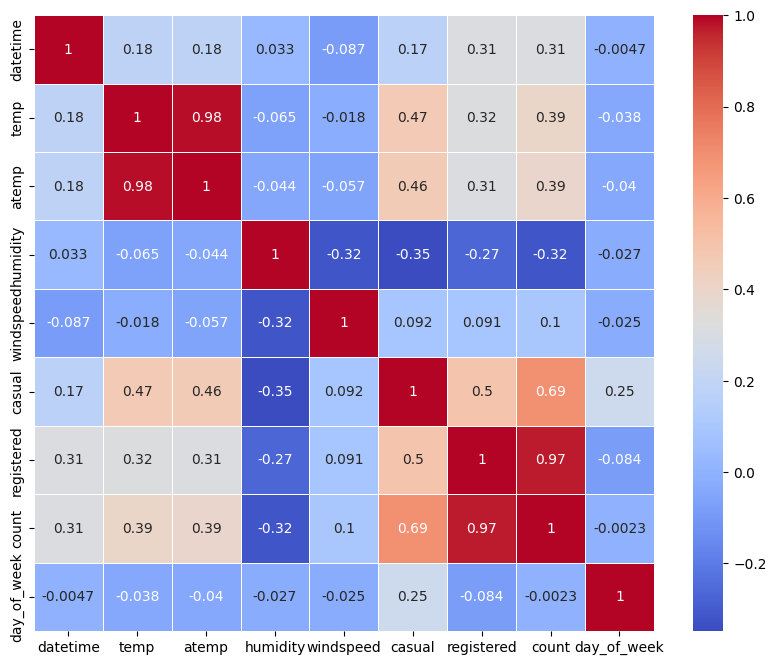

In [ ]:
plt.figure(figsize=(10,8))
cols = ['season', 'holiday', 'workingday', 'weather']
#df[cols] = df[cols].astype('category')

# Drop the categorical columns or encode them appropriately if needed
corr_matrix = df.drop(columns=cols).corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()


In [ ]:
season_group = df.groupby('season')['count'].mean()
season_group

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


In [ ]:
weather_group = df.groupby('weather')['count'].mean()
weather_group

,count
weather,
1,205.236791
2,178.955540
3,118.846333
4,164.000000


In [ ]:
workingday_group = df.groupby('workingday')['count'].mean() #1 is weekday or when it is no holiday 0 is weekend or holiday
workingday_group

,count
workingday,
0,188.506621
1,193.011873


In [ ]:
df.groupby(["season"])[["casual","registered","count"]].sum()


,casual,registered,count
season,,,
1,41605,270893,312498
2,129672,458610,588282
3,142718,497944,640662
4,78140,465894,544034


In [ ]:
df.groupby(["weather"])[["casual","registered","count"]].sum()


,casual,registered,count
weather,,,
1,289900,1186163,1476063
2,87246,419914,507160
3,14983,87106,102089
4,6,158,164


In [ ]:
df.groupby(["workingday"])[["casual","registered","count"]].sum()


,casual,registered,count
workingday,,,
0,206037,448835,654872
1,186098,1244506,1430604


In [ ]:
df.groupby(["holiday"])[["casual","registered","count"]].sum()


,casual,registered,count
holiday,,,
0,376964,1650704,2027668
1,15171,42637,57808


In [ ]:
df.groupby(["temp"])[["casual","registered","count"]].sum()


,casual,registered,count
temp,,,
0.82,6,538,544
1.64,7,176,183
2.46,11,204,215
3.28,9,203,212
4.10,52,2160,2212
4.92,106,3399,3505
5.74,205,5491,5696
6.56,432,9512,9944
7.38,392,6790,7182


In [ ]:
df.groupby(["atemp"])[["casual","registered","count"]].sum()


,casual,registered,count
atemp,,,
0.760,0,2,2
1.515,0,3,3
2.275,1,265,266
3.030,13,563,576
3.790,19,606,625
4.545,26,701,727
5.305,57,1523,1580
6.060,176,4560,4736
6.820,189,3363,3552


Check if there any significant difference between the no. of bike rides on Weekdays
and Weekends?


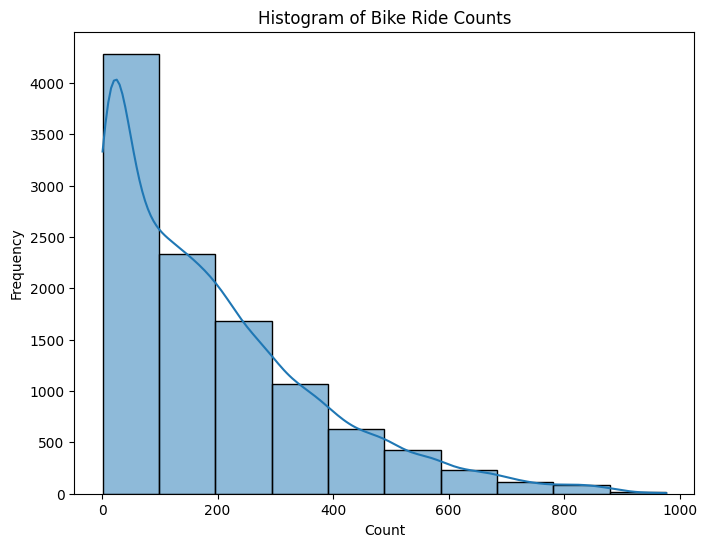

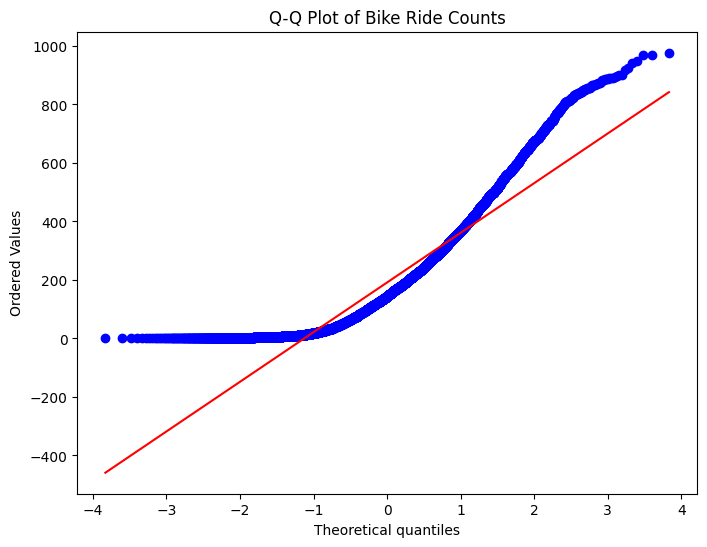

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.8783658962690556, pvalue=5.369837893115507e-68)

In [ ]:
#Null Hypothesis (H₀): There is no significant difference in the number of bike rides between weekdays and weekends.
#---------------------------------------------------------------------------
#Alternate Hypothesis (Ha): There is significant difference in the number of bike rides between weekdays and weekends

count_data = df['count']

# 1. Histogram
plt.figure(figsize=(8, 6))
sns.histplot(count_data, kde=True, bins=10)
plt.title('Histogram of Bike Ride Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(count_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Bike Ride Counts')
plt.show()

# 3. Shapiro-Wilk Test
shapiro_test = stats.shapiro(count_data)

shapiro_test

Here the data is not normal it is skewed data

In [ ]:
df['day_of_week'] = df['datetime'].dt.dayofweek

# Define Weekends (Saturday = 5, Sunday = 6) and Weekdays (Monday to Friday)
weekends = df[(df['day_of_week'] == 5) | (df['day_of_week'] == 6)]['count']
weekdays = df[(df['day_of_week'] >= 0) & (df['day_of_week'] <= 4)]['count']

# Perform 2-Sample Independent T-test
t_stat, p_value = stats.ttest_ind(weekdays, weekends, equal_var=False)  # Assuming unequal variance

t_stat, p_value

(1.0589713677293344, 0.2896542265218858)

In [ ]:
if p_value <= 0.05:
    print("Reject the null hypothesis. There is a significant difference in the number of bike rides between weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of bike rides between weekdays and weekends.")

Fail to reject the null hypothesis. There is no significant difference in the number of bike rides between weekdays and weekends.


Check if the demand of bicycles on rent is the same for different Weather
conditions?


---------------------------------------------------------------------


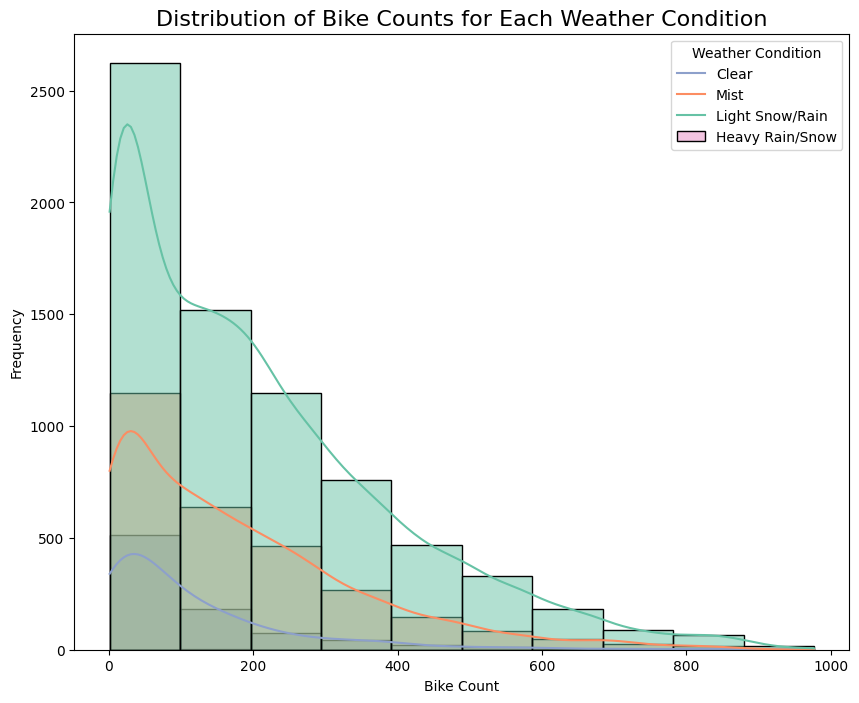

In [ ]:
# Visualizing the distribution of bike counts for each weather condition
#Null Hypothesis (H₀): The average demand for bicycles (rental count) is the same across all weather conditions.
#------------------------------------------------------------------------
#Alternative Hypothesis (H₁): The average demand for bicycles (rental count) is not the same for at least one pair of weather conditions.#

# Set the data for visualization
plt.figure(figsize=(10, 8))

# Creating histograms for each weather condition
sns.histplot(data=df, x='count', hue='weather', kde=True, bins=10, palette='Set2')

# Adding titles and labels
plt.title('Distribution of Bike Counts for Each Weather Condition', fontsize=16)
plt.xlabel('Bike Count')
plt.ylabel('Frequency')
plt.legend(title='Weather Condition', labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()


As we can our data is not normal distribution

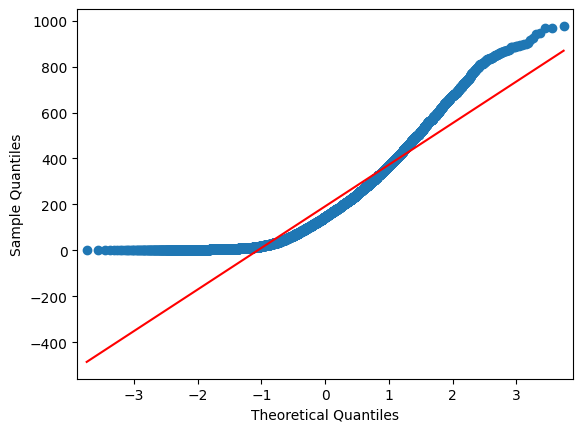

In [ ]:
from statsmodels.graphics.gofplots import qqplot


qqplot(df['count'],line='s')
plt.show()


In [ ]:
from scipy.stats import shapiro
np.random.sample(42)

count_data = df['count'].sample(1000)

test_statics, p_value = shapiro(count_data)
p_value

2.9283215627227718e-27

In [ ]:
if p_value < 0.05:
  print('Reject the null hypothesis')
  print('Data is not Gusian')
else:
  print('Fail to reject null hypothesis')
  print('Data is Gausian')

Reject the null hypothesis
Data is not Gusian


In [ ]:
from scipy.stats import levene # Test variance
weather_groups = [df['count'][df['weather'] == i] for i in df['weather'].unique()]

# Perform Levene's Test
levene_stat, p_value = stats.levene(*weather_groups)

if p_value < 0.05:
    print("Variances are not equal")

Variances are not equal


In [ ]:
#hence throught the above result we can say assumptions of anova are not satisfied and we will be using Kruskal_wallis Test
from scipy .stats import kruskal
t_statics,p_value = kruskal(*weather_groups)
p_value

3.501611300708679e-44

In [ ]:
if p_value <= 0.05:
    print("Reject the null hypothesis. There is a significant difference in the average demand for bicycles across weather conditions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average demand for bicycles across weather conditions.")

Reject the null hypothesis. There is a significant difference in the average demand for bicycles across weather conditions.


**Inference and Conclusions**
* Weather conditions significantly affects bicycles demands and this proves certain weather conditions are more favourable while others are not much  
* Specific Weather conditions such as Clear and partly cloudy would have more demands on renting of bicycles compared to snowfall or heavy rainfall.





**Weather-Sensitive Pricing and Availability Recommendations**

If certain weather conditions significantly decrease bike rentals, consider dynamic pricing to encourage rentals during these times or reduce the fleet to save costs.
Conversely, during favorable weather conditions, ensuring a higher availability of bicycles could meet increased demand.
Operational Adjustments:

Use weather forecasts to adjust the number of bikes available at different locations. For example, if bad weather is expected, fewer bikes might be needed.
Consider offering promotions or discounts on days with less favorable weather to maintain rental levels.





Check if the demand of bicycles on rent is the same for different Seasons?


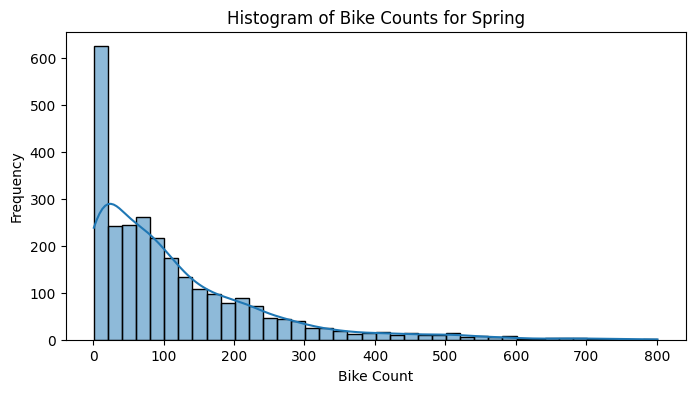

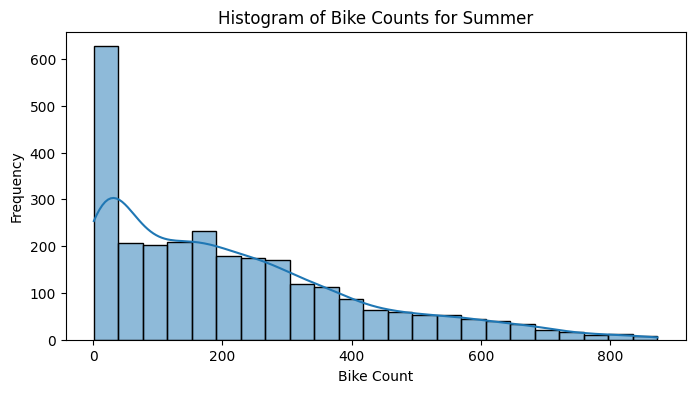

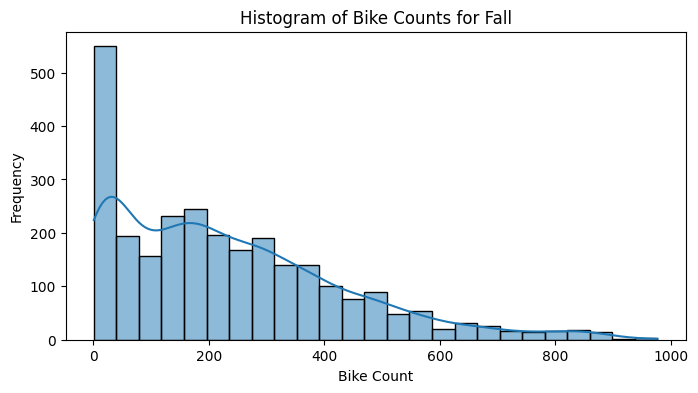

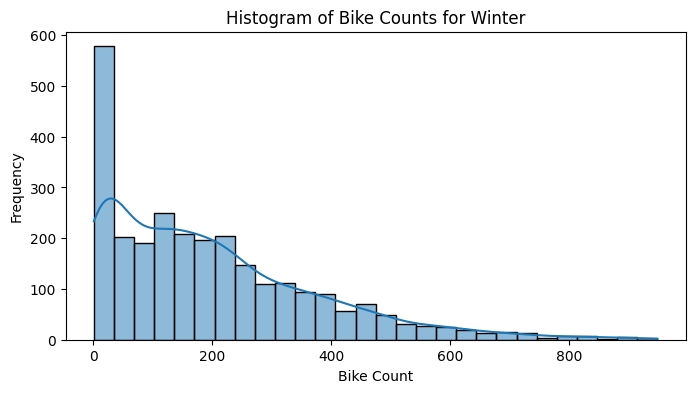

In [ ]:
#Null Hypothesis (H₀): The average demand for bicycles (rental count) is the same across all seasons.
#-----------------------------------------------------------------
#Alternative Hypothesis (H₁): The average demand for bicycles (rental count) is not the same for at least one pair of seasons.

#Lets check for data normalization

season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Plot histograms for each season
for season in df['season'].unique():
    plt.figure(figsize=(8,4 ))
    sns.histplot(df[df['season'] == season]['count'], kde=True)
    plt.title(f'Histogram of Bike Counts for {season_labels.get(season, season)}')
    plt.xlabel('Bike Count')
    plt.ylabel('Frequency')
    plt.show()

We can easily see that data is not normal it is right skewed

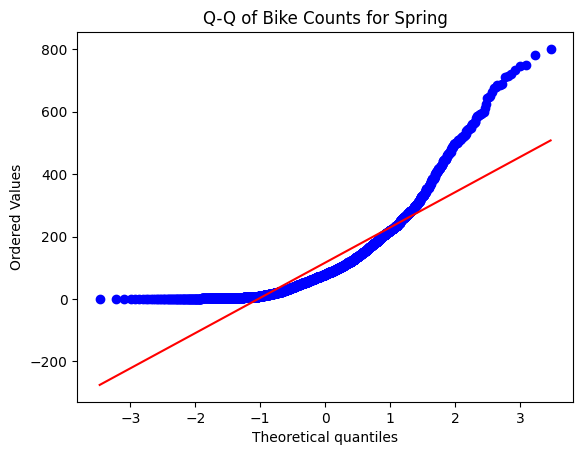

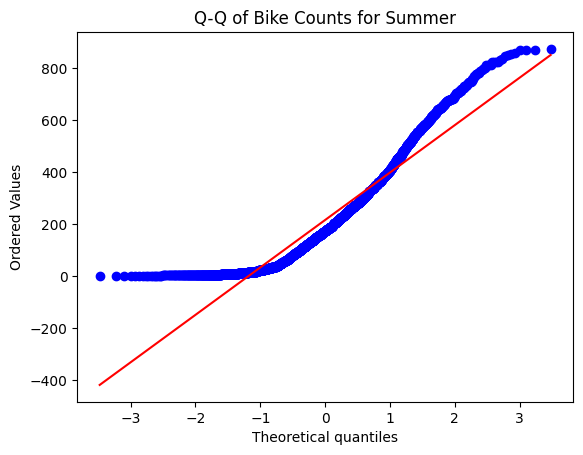

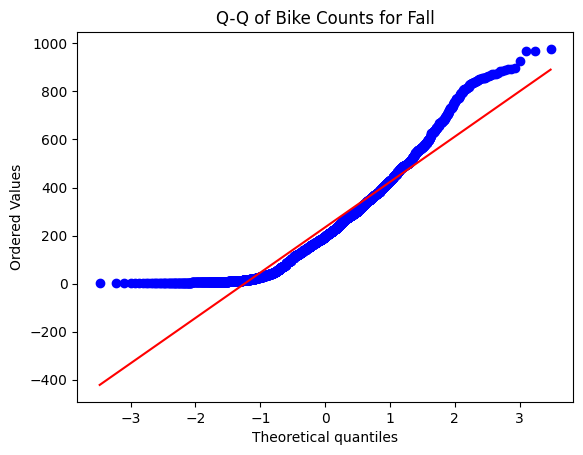

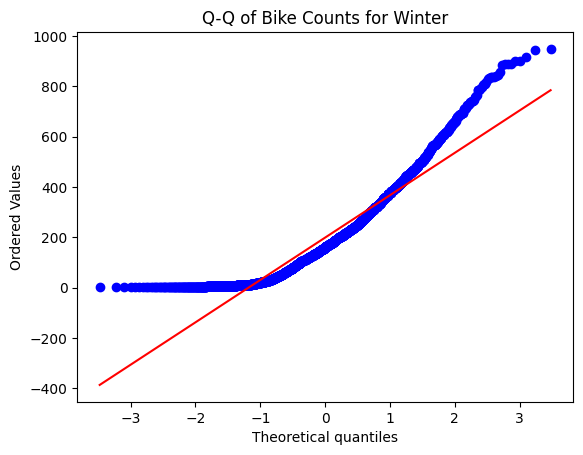

In [ ]:

season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Plot Q-Q for each season
for season in df['season'].unique():

    stats.probplot(df[df['season'] == season]['count'], dist="norm",plot=plt)
    plt.title(f'Q-Q of Bike Counts for {season_labels.get(season, season)}')

    plt.show()

In [ ]:
season_groups = [df['count'][df['season'] == i] for i in df['season'].unique()]
for i, season in enumerate(df['season'].unique()):
    stat, p = stats.shapiro(season_groups[i])
    print(f'Shapiro-Wilk Test for Season {season}: W={stat}, p-value={p}')
    if p > 0.05:
        print('Data is normal')
    else:
        print('Data is not normal')

Shapiro-Wilk Test for Season 1: W=0.8087378401253588, p-value=8.749584618867662e-49
Data is not normal
Shapiro-Wilk Test for Season 2: W=0.9004818080893252, p-value=6.039374406270491e-39
Data is not normal
Shapiro-Wilk Test for Season 3: W=0.9148166372899196, p-value=1.043680518918597e-36
Data is not normal
Shapiro-Wilk Test for Season 4: W=0.8954637482095505, p-value=1.1299244409282836e-39
Data is not normal


In [ ]:
levene_stat, p_value = stats.levene(*season_groups)
print(f'Levene’s Test: W={levene_stat}, p_value={p_value}')


Levene’s Test: W=187.7706624026276, p_value=1.0147116860043298e-118


In [ ]:
if p_value < 0.05:
    print("Variances are not equal")

Variances are not equal


In [ ]:
#Krsukal test
t_statics,p_value = kruskal(*season_groups)
p_value

2.479008372608633e-151

In [ ]:
if p_value <= 0.05:
  print("Reject the null hypothesis. There is a significant difference in the average demand for bicycles across seasons.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in the average demand for bicycles across seasons.")

Reject the null hypothesis. There is a significant difference in the average demand for bicycles across seasons.


** **bold text**Inference and Conclusions**
***Distribution Patterns Across Seasons:***
-------
Spring: If the histogram for spring shows a higher concentration of bike rentals around certain count values, it suggests that spring may have a relatively consistent demand for bike rentals.
Summer: A wider distribution in the summer histogram might indicate more variability in bike rentals, potentially due to varying weather conditions or increased tourist activity.
Fall: If the fall histogram shows a distribution similar to spring or summer, it suggests that bike rental patterns may not drastically change during fall.
Winter: A histogram with lower counts or a left-skewed distribution for winter could suggest that bike rentals decrease significantly during colder months, possibly due to unfavorable weather conditions.
Peak Seasons: If one season (like summer) shows a higher peak in the histogram, it indicates that this season has the highest demand for bike rentals.
Off-Peak Seasons: Conversely, a lower peak or more dispersed distribution in winter suggests a lower and more unpredictable demand.
Skewness: If the distribution for any season is skewed (e.g., right-skewed in summer), it might suggest occasional spikes in rentals due to specific events or days with favorable weather.
Bimodal Distribution: A bimodal distribution might indicate two distinct types of rental days (e.g., weekdays vs. weekends, or normal days vs. special events).

The histograms reveal that bike rental demand varies by season, with some seasons (e.g., summer) showing higher and more variable demand, while others (e.g., winter) show lower and more stable demand.



**Recommendations**
---------
Summer: Given the higher and variable demand, it would be wise to increase the number of bikes available during the summer months and potentially increase prices during peak times.
Winter: Lower demand in winter suggests a potential for reducing fleet size or offering promotions to boost rentals during off-peak times.
Planning and Resource Allocation:

Dynamic Inventory Management: Adjusting the number of available bikes based on the season can help optimize resource allocation and meet customer demand more effectively.
Targeted Marketing: Marketing efforts can be tailored to promote bike rentals more heavily during seasons with lower demand (e.g., offering discounts or special packages in winter).
Recommendations
Increase Bike Availability in Peak Seasons:

Ensure more bikes are available during summer and potentially spring, as these seasons likely see higher demand.
Introduce Seasonal Pricing:

Implement dynamic pricing strategies, with higher prices during peak seasons like summer and lower prices during off-peak seasons like winter.
Promotions in Off-Peak Seasons:


Offer discounts or special promotions during winter to encourage more bike rentals despite the lower natural demand.
Monitor Weather Patterns:

As weather can vary even within seasons, consider tracking weather forecasts to adjust bike availability and pricing in real-time.



In [ ]:
#Null Hypothesis (H₀): Weather conditions are independent of the season. In other words, the distribution of weather conditions is the same across all seasons.

#------------------------------------------------------------------------------------------------
#Alternative Hypothesis (H₁): Weather conditions are not independent of the season. In other words, the distribution of weather conditions varies across seasons.

In [ ]:
df_encoded = pd.get_dummies(df, columns=['weather', 'season'], drop_first=True)
df_encoded.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,day_of_week,weather_2,weather_3,weather_4,season_2,season_3,season_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,5,False,False,False,False,False,False
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,5,False,False,False,False,False,False
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,5,False,False,False,False,False,False
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,5,False,False,False,False,False,False
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,5,False,False,False,False,False,False


In [ ]:
contingency_vals = pd.crosstab(df['season'], df['weather'])
contingency_vals

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_vals)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"p-value: {p_value}")


Chi-square Statistic: 49.158655596893624
p-value: 1.549925073686492e-07


In [ ]:
if p_value <= 0.05:
    print("Reject the null hypothesis. Weather conditions are not independent of the season.Weather conditions are significantly different accross seasons")
else:
    print("Fail to reject the null hypothesis. Weather conditions are independent of the season.Weather conditions are same accross seasons")

Reject the null hypothesis. Weather conditions are not independent of the season.Weather conditions are significantly different accross seasons


Inferences and Conclusions

Here we can see that although weather is not uniform accross the year but there is even variation in association with the season .

Recommendations
Yulu should consider season specific strategies For example increasing number of bikes in clear weather and providing discounts during rainy weather

Providing Offer discounted rides during the monsoon to encourage usage. Ensure that Yulu bikes and scooters are equipped with waterproof seat covers and rain protection gear to improve user comfort during rainy days.

Introduce features like built-in sunshades or provide cooling towels and water bottles as part of a summer promotion. Also, consider offering ride discounts during early mornings and late evenings when the heat is less intense.

Launch a "Beat the Heat" campaign offering rides at discounted rates during non-peak heat hours.


**Other Recommendations**


Continue to focus on expanding operations in metro cities with high traffic congestion, such as Mumbai, Delhi, Bangalore, and Pune. Use localized marketing campaigns that address specific city traffic issues and highlight Yulu as an efficient alternative.

Partner with local governments for designated parking and charging stations, making Yulu an integrated part of the urban transportation infrastructure.

Customized pricing strategies to be more affordable in regions where school and colleges are more even where people go for public parks and temples

Collaborate with educational institutions and business parks to offer campus or workplace-specific Yulu zones.

yulu can design dynamic allocation and reposition the fleet based on real time demand forecast they get and can arrange it accordingly

ontinuously enhance the Yulu app with features like real-time traffic updates, route optimization, and integration with public transport schedules to provide seamless end-to-end mobility solutions